In [9]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Creating the dataframe that contains all the pittsburgh traffic data, including the average daily car traffic within each neighborhood

In [8]:
traffic = pd.read_csv("pitt-traffic-count.csv", index_col="neighborhood")
traffic = traffic.dropna(how='all')
traffic.head()

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,...,speed95_percent,longitude,latitude,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
neighborhood,,,,,,,,,,,,,,,,,,,,,
Polish Hill,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,...,37.0,-79.967772,40.455733,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
Central Lawrenceville,1026101993,140,1.121444e+09,2019-01-24,NaN,NaN,NaN,NaN,Intersection Study,NaN,...,NaN,-79.952249,40.466157,7.0,9.0,42003090200,2.0,9.0,2.0,3-6
Windgap,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,35.0,...,41.0,-80.076469,40.460717,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
Squirrel Hill South,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,...,33.0,-79.914335,40.437379,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
Perry North,1039546167,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-80.019211,40.490794,1.0,26.0,42003260200,1.0,26.0,1.0,1-15


Now we will create a graph of all the neighborhoods. The graph is sorted in asceding order and only the first 20 neighborhoods, the ones which have a recorder value, are shown

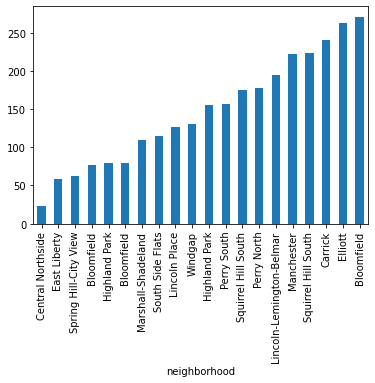

In [22]:
traffic["average_daily_car_traffic"].dropna(how='any').sort_values(ascending=True)[:20].plot(kind='bar')

We can better visualize this data through the use of a map. The neighborhoods which have more traffic will have a brighter color like green or yellow, while neighborhoods with lower traffic will have a cooler color like dark blue or purple. Neighborhoods with no data will be light grey

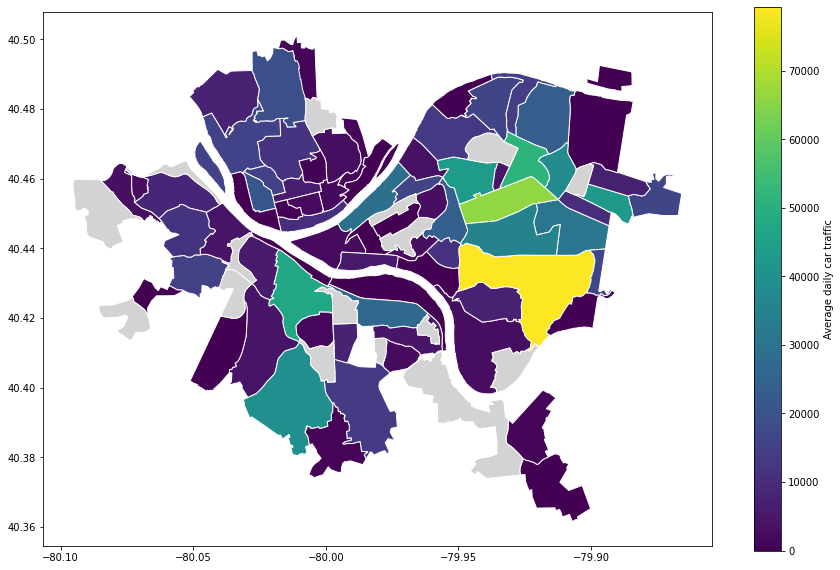

In [24]:
num_traf = traffic.groupby("neighborhood").sum()['average_daily_car_traffic']

traf_map = neighborhoods.merge(num_traf, how='left', left_on='hood', right_on='neighborhood')

traf_map.plot(column="average_daily_car_traffic", 
            cmap='viridis',
            edgecolor="white",
            legend=True,
            legend_kwds={'label': "Average daily car traffic"},
            figsize=(15,10),
            missing_kwds={"color": "lightgrey"})